## Importing Libraries

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

#### Conv2D - crestes a convolutional kernel that is convolved with the input image to produce a set of output features that is it applies filters to the original image and produces a new set of feature maps that represent the different features of the input image. It is used in CNN fpr image processing like image recognition.
#### MaxPooling2D layer- it down samples the image produced by Conv2D layer by taking the maximum value within a small kernel or window which reduces the dimensionality of the input which helps to reduce the number the number of parameter in the model and improve its performance.
#### Flatten- this layers flattens the input tensor into a one dimensional Vector, which is useful for when transitioning from convolutional layer to a fully connected layer which requires a 1D input. It is used in neural network for image classification tasks
#### Dense- standard fully connected neural network layer where each neuron is connected to all the neurons in the previous layer, used for image classification tasks


## Loading the dataset
#### MNIST dataset is a part of keras library

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## Displaying a sample image

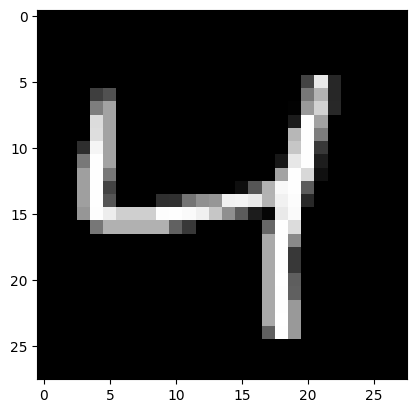

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2], cmap='gray')
plt.show()

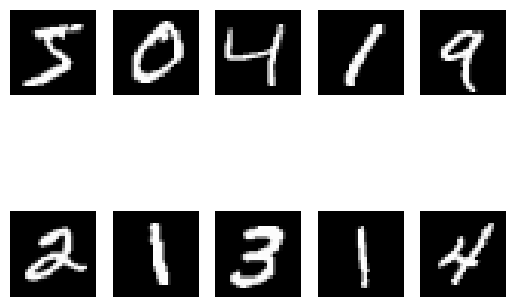

In [14]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')

## Data Preprocessing
### Feature Engineering
#### 1.Normalization- is scaling the pixel values of image to have a 0 mean and standard deviation of 1.It helps to improve the functionality of the model like training
#### 2. Reshape the dataset-CNN requires the input data to be 4D( batch_size{no. of training examples that are processed in one forward/backward pass}, height, width, channels{the no. of channelsin each input image like 1 for grayscale, 3 for rgb})
#### 3.One Hot Encoding

In [10]:
#Normalization
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


### Rescaling advantages
###### Improve the performance of the model, puts all the values on the same scale(which can help the model converge faster during the training and prevent numerical instability), also ensures all the features have roughly the same scale

In [11]:
#Reshaping the data
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [17]:
#one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
#Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [20]:
#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
#Train model on training data
model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 20s 42ms/step - loss: 0.2742 - accuracy: 0.9223 - val_loss: 0.0727 - val_accuracy: 0.9770
Epoch 2/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0515 - val_accuracy: 0.9818
Epoch 3/10
469/469 [==============================] - 27s 58ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.0401 - val_accuracy: 0.9869
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0440 - accuracy: 0.9870 - val_loss: 0.0371 - val_accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0350 - val_accuracy: 0.9889
Epoch 6/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0353 - val_accuracy: 0.9892
Epoch 7/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0388 - val_accuracy:

## Model accuracy

In [23]:
#Evaluate the model on thetest set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print('Test accuracy:',test_acc)

Test accuracy: 0.9884999990463257
